# @Holger Elias Rivera Espinola¶
# PROGRAMA DE RECONHECIMENTO DE PADRÕES
# CLASSIFICAÇÃO - MÁQUINAS DE VETORES DE SUPORTE

# CLASSIFICAÇÃO LINEAR - BRACA2 VS. OUTROS

In [1]:
#leitura do arquivo csv 
from csv import reader

#carregamento dos dados
def load_csv(filename):
    file=open(filename,"r")
    lines=reader(file)
    dataset=list(lines)
    return dataset

#executar leitura do arquivo csv
filename='data_breast_cancer.csv'
dataset=load_csv(filename)
print('Dados carregados do arquivo: {0} com #filas: {1} e #colunas: {2}'.format(filename,len(dataset),len(dataset[0])))

Dados carregados do arquivo: data_breast_cancer.csv com #filas: 3228 e #colunas: 23


In [2]:
#dataset para o problema 2
datasetp2=[]
j1=0
for j in range(1,len(dataset[0])):
    if dataset[-1][j]=='BRACA2': #braca2
        datasetp2.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp2[j1][-1]=-1
        j1=j1+1
    else: #outros
        datasetp2.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp2[j1][-1]=1
        j1=j1+1
        
#vista dos dados
#print(datasetp2)
print('#filas: {0} ; #colunas: {1}'.format(len(datasetp2),len(datasetp2[0])))

#filas: 22 ; #colunas: 3227


In [3]:
#criacao do x1 (braca2) e x2 (outros)
def braca2_outros(gene):
    lbraca=[]
    braca2=[]
    outros=[]
    ib1=0
    ib2=0
    for i in range(len(datasetp2)):
        if datasetp2[i][-1]==-1:  #carateristica pertence a braca2
            braca2.insert(ib1,float(datasetp2[i][gene]))
            ib1=ib1+1
        else: #carateristica pertence a outros
            outros.insert(ib2,float(datasetp2[i][gene]))
            ib2=ib2+1
    lbraca.insert(0,braca2)
    lbraca.insert(1,outros)
    return lbraca

#exemplo: para gene 271 e 1442
print(braca2_outros(271))
print(braca2_outros(1442))

[[1.51, 1.3, 1.03, 1.39, 0.6613, 0.6689, 0.6924, 1.2432], [2.05, 1.88, 1.52, 1.64, 1.67, 1.19, 1.0, 0.99, 1.0, 0.98, 1.02, 1.09, 1.39, 1.59]]
[[0.68, 0.95, 0.83, 0.63, 0.7916, 0.6842, 0.6891, 0.8303], [1.19, 1.64, 1.44, 1.64, 1.07, 1.63, 1.31, 1.14, 0.74, 0.99, 1.13, 1.09, 0.67, 1.52]]


In [4]:
#criacao do sn={[(gene_a)i,(gene_b)i],yi}
def criar_sn(genea,geneb):
    sn=[]
    x=[]
    y=[]
    x=braca2_outros(genea)
    y=braca2_outros(geneb)
    for i in range(0,len(x[0])):
        sn.insert(i,[x[0][i],y[0][i],-1])
    for i in range(0,len(x[1])):
        sn.insert((i+len(x[0])),[x[1][i],y[1][i],1])
    return sn

#exemplo: criar um sn para os genes 271 e 1442
print(criar_sn(271,1442))

[[1.51, 0.68, -1], [1.3, 0.95, -1], [1.03, 0.83, -1], [1.39, 0.63, -1], [0.6613, 0.7916, -1], [0.6689, 0.6842, -1], [0.6924, 0.6891, -1], [1.2432, 0.8303, -1], [2.05, 1.19, 1], [1.88, 1.64, 1], [1.52, 1.44, 1], [1.64, 1.64, 1], [1.67, 1.07, 1], [1.19, 1.63, 1], [1.0, 1.31, 1], [0.99, 1.14, 1], [1.0, 0.74, 1], [0.98, 0.99, 1], [1.02, 1.13, 1], [1.09, 1.09, 1], [1.39, 0.67, 1], [1.59, 1.52, 1]]


In [5]:
import cvxopt as opt
from math import sqrt

In [6]:
# PROBLEMA PRIMAL
# 1) Min 1/2 * X.T*P*X + q.T*X
# 2) G*X <= h
c=10000

In [7]:
def gerar_matriz_aux(sn):
    y=[]    
    for i in range(0,len(sn)):
        y.append(sn[i][2])        
    aux=[]
    for i in range(0,len(sn)):
        aux.append([sn[i][0],sn[i][1],1])
    for i in range(0,len(aux)):
        for j in range(0,len(aux[0])):
            aux[i][j]=aux[i][j]*y[i]*(-1)
    return aux

#exemplo:
aux_prova=[]
aux_prova=gerar_matriz_aux(criar_sn(271,1442))
print(aux_prova)

[[1.51, 0.68, 1], [1.3, 0.95, 1], [1.03, 0.83, 1], [1.39, 0.63, 1], [0.6613, 0.7916, 1], [0.6689, 0.6842, 1], [0.6924, 0.6891, 1], [1.2432, 0.8303, 1], [-2.05, -1.19, -1], [-1.88, -1.64, -1], [-1.52, -1.44, -1], [-1.64, -1.64, -1], [-1.67, -1.07, -1], [-1.19, -1.63, -1], [-1.0, -1.31, -1], [-0.99, -1.14, -1], [-1.0, -0.74, -1], [-0.98, -0.99, -1], [-1.02, -1.13, -1], [-1.09, -1.09, -1], [-1.39, -0.67, -1], [-1.59, -1.52, -1]]


In [8]:
def gerar_matriz_P(aux):
    P=[]
    #primeiras 3 filas (para w1, w2 e b)
    for i in range(0,len(aux[0])):
        v=[]
        for j in range(0,len(aux[0])+len(aux)):
            if i==j and j<=1:
                v.append(2.0)
            else:
                v.append(0.0)
        P.append(v)
    #posteriores "n" filas
    for i in range(0,len(aux)):
        v2=[]
        for j in range(0,len(aux[0])+len(aux)):
            v2.append(0.0)
        P.append(v2)
    P=opt.matrix(P)
    P=P.T
    return P
#exemplo:
P_prova=[]
P_prova=gerar_matriz_P(aux_prova)
print(P_prova)

[ 2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  2.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [9]:
def gerar_vetor_q(aux):
    q=[]
    for i in range(0,len(aux[0])):
        q.append(0.0)
    for j in range(0,len(aux)):
        q.append(c)
    q=opt.matrix(q)
    return q

#exemplo:
q_prova=[]
q_prova=gerar_vetor_q(aux_prova)
print(q_prova)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]
[ 1.00e+04]



In [10]:
def gerar_matriz_G(aux):
    G=[]
    #primeiras "n" filas
    for i in range(0,len(aux)):
        v=[]
        for j in range(0,len(aux[0])):
            v.append(aux[i][j])
        for k in range(0,len(aux)):
            if i==k:
                v.append(-1.0)
            else:
                v.append(0.0)
        G.append(v)
    #as "n" filas posteriores
    for i in range(0,len(aux)):
        v2=[]
        for j in range(0,len(aux[0])):
            v2.append(0.0)
        for k in range(0,len(aux)):
            if i==k:
                v2.append(-1.0)
            else:
                v2.append(0.0)
        G.append(v2)
    #gerar formato matricial
    G=opt.matrix(G)
    G=G.T
    return G

#exemplo:
g_prova=[]
g_prova=gerar_matriz_G(aux_prova)
print(g_prova)


[ 1.51e+00  6.80e-01  1.00e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.30e+00  9.50e-01  1.00e+00  0.00e+00 -1.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.03e+00  8.30e-01  1.00e+00  0.00e+00  0.00e+00 -1.00e+00  0.00e+00 ... ]
[ 1.39e+00  6.30e-01  1.00e+00  0.00e+00  0.00e+00  0.00e+00 -1.00e+00 ... ]
[ 6.61e-01  7.92e-01  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 6.69e-01  6.84e-01  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 6.92e-01  6.89e-01  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[ 1.24e+00  8.30e-01  1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-2.05e+00 -1.19e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.88e+00 -1.64e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.52e+00 -1.44e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.64e+00 -1.64e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]
[-1.67e+00 -1.07e+00 -1.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00 ... ]

In [11]:
def gerar_vetor_h(aux):
    h=[]
    for i in range(0,len(aux)):
        h.append(-1.0)
    for j in range(0,len(aux)):
        h.append(0.0)
    h=opt.matrix(h)
    return h

#exemplo:
h_prova=[]
h_prova=gerar_vetor_h(aux_prova)
print(h_prova)

[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [12]:
def calcular_solucao(P,q,G,h):
    sol=opt.solvers.qp(P,q,G,h)
    z=[]
    z=sol['x']
    return z

#exemplo: para genes 271 e 1442
z_prova=[]
z_prova=calcular_solucao(P_prova,q_prova,g_prova,h_prova)
print(z_prova)

     pcost       dcost       gap    pres   dres
 0: -1.3327e+09 -5.3961e+07  8e+08  1e+04  1e-15
 1: -1.0257e+08 -1.6814e+07  7e+07  1e+03  6e-13
 2:  1.9542e+06 -1.6856e+06  1e+07  4e+01  2e-14
 3:  9.2956e+05 -4.0370e+03  1e+06  1e+00  3e-14
 4:  1.0151e+05  4.8936e+04  6e+04  5e-02  1e-13
 5:  1.0186e+05  6.3333e+04  4e+04  3e-02  8e-14
 6:  9.3351e+04  6.2567e+04  3e+04  1e-02  9e-14
 7:  7.8438e+04  6.8803e+04  1e+04  3e-03  2e-14
 8:  7.6511e+04  7.2054e+04  5e+03  4e-04  3e-15
 9:  7.3536e+04  7.3329e+04  2e+02  2e-05  1e-14
10:  7.3396e+04  7.3393e+04  2e+00  2e-07  7e-15
11:  7.3394e+04  7.3394e+04  2e-02  2e-09  1e-14
Optimal solution found.
[ 7.41e-01]
[ 5.64e+00]
[-5.95e+00]
[ 5.22e-08]
[ 1.37e+00]
[ 4.90e-01]
[ 4.25e-08]
[ 1.10e-07]
[ 4.33e-08]
[ 4.32e-08]
[ 6.50e-01]
[ 4.34e-08]
[ 4.30e-08]
[ 4.32e-08]
[ 4.30e-08]
[ 4.46e-08]
[ 4.31e-08]
[ 4.34e-08]
[ 4.43e-08]
[ 2.04e+00]
[ 6.45e-01]
[ 4.48e-08]
[ 1.61e-07]
[ 2.15e+00]
[ 4.31e-08]



In [13]:
def calcular_margem(z):
    margem=0
    margem=round((2.0)/sqrt(z[0]**2+z[1]**2),6)
    return margem

#exemplo para calculo de margem z_prova
mg_prova=calcular_margem(z_prova)
print(mg_prova)

0.351744


In [15]:
def lista_margens(datasetp2):    
    k=0
    epsilon=1e-8
    lmargens=[]
    for i in range(0,99):
        for j in range(i+1,100):
            sn=[]
            sn=criar_sn(i,j)
            aux=[]
            aux=gerar_matriz_aux(sn)
            P=[]
            P=gerar_matriz_P(aux)
            q=[]
            q=gerar_vetor_q(aux)
            G=[]
            G=gerar_matriz_G(aux)
            h=[]
            h=gerar_vetor_h(aux)            
            z=[]
            z=calcular_solucao(P,q,G,h)
            marg=0
            marg=calcular_margem(z)
            
            #condicao de problema linearmente separável
            lseparavel=1
            for ct in range(0,len(aux)):
                if z[ct+len(aux[0])]>epsilon:
                    lseparavel=0
            if lseparavel==1:
                lmargens.insert(k,[i,j,marg,[z[0],z[1],z[2]]]) # lmargem[i]=[genea,geneb,margem,[w1,w2,b]]
                k=k+1
    return lmargens

#verificando a lista de margens de todas as combinacoes
#para os primeiros 100 pares de genes
lm=[]
lm=lista_margens(datasetp2)
print(lm)

     pcost       dcost       gap    pres   dres
 0: -1.3222e+09 -5.2547e+07  7e+08  1e+04  8e-16
 1: -9.5572e+07 -1.2196e+07  8e+07  1e+03  1e-13
 2:  4.9831e+06 -5.2372e+05  8e+06  2e+01  5e-15
 3:  3.2402e+05  5.4610e+04  3e+05  2e-02  3e-14
 4:  1.4914e+05  6.3665e+04  9e+04  5e-03  1e-14
 5:  1.3301e+05  7.2789e+04  6e+04  3e-03  2e-14
 6:  1.1338e+05  7.9648e+04  3e+04  7e-04  5e-15
 7:  9.7113e+04  8.9312e+04  8e+03  9e-05  3e-15
 8:  9.3781e+04  9.1674e+04  2e+03  2e-05  9e-15
 9:  9.2905e+04  9.2003e+04  9e+02  7e-06  6e-14
10:  9.2440e+04  9.2343e+04  1e+02  4e-16  4e-15
11:  9.2382e+04  9.2381e+04  1e+00  3e-16  6e-14
12:  9.2381e+04  9.2381e+04  1e-02  5e-16  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2905e+09 -4.5113e+07  4e+08  1e+04  8e-16
 1: -8.8093e+07 -6.8460e+06  6e+07  9e+02  3e-13
 2:  6.0936e+05 -1.7959e+05  6e+06  3e+01  1e-14
 3:  1.4353e+05  5.7025e+04  2e+05  7e-01  3e-14
 4:  1.1870e+05  6.9792e+04  8e+04  2e-01  3e-1

In [16]:
#funcao para escolher top10
def select_top10(lmarg):
    top10=[]
    lmarg.sort(reverse=True,key=lambda x:x[2])
    for i in range(0,10):
        top10.insert(i,lmarg[i])
    return top10

#obtendo a lista dos 10 melhores
best10x=[]
best10x=select_top10(lm)
print(best10x)

[[28, 94, 0.151724, [13.149847217302247, -0.917430772900213, -14.088686336292314]], [28, 87, 0.14262, [13.201320608665569, -4.730472213647065, -10.891090706157406]], [28, 36, 0.129144, [13.732486300409109, -7.1592260992432, -12.759753994613803]], [14, 28, 0.11879, [-4.383583091348564, 16.255722086661308, -16.83744281137605]], [28, 88, 0.099499, [19.99582873179677, -2.0497846714094847, -22.765749366512544]], [28, 78, 0.096586, [19.869286970406375, -5.830072854676175, -20.38849832000013]], [28, 57, 0.080524, [13.33460330568191, 20.954376618983314, -34.12715498979712]], [17, 94, 0.06581, [-30.027548273963475, -4.68319561685765, 56.983471226510865]], [9, 28, 0.059055, [19.539228905103773, 27.662101224299573, -47.20457611581619]], [3, 28, 0.042412, [-9.47917189800837, 46.19446418528468, -44.59640619417558]]]


In [17]:
#criar relatorio de gráfica com pontos
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def relatorio(coef,sn,genea,geneb):
    #definicao dos pontos segundo sua classe
    br2=[]
    outros=[]
    for i in range(0,len(sn)):
        if sn[i][2]==-1:   #braca2
            br2.append(sn[i])
        else:              #outros
            outros.append(sn[i])
    pontos_braca2=np.array(br2)
    pontos_outros=np.array(outros)
    plt.grid()
    plt.scatter(pontos_braca2[:,0],pontos_braca2[:,1],c='blue')
    plt.scatter(pontos_outros[:,0],pontos_outros[:,1],c='red')
    
    #gráfica da superf. decisao e vetores de suporte    
    plt.title("Sup. Decisão: "+str(round(coef[0],3))+"*x1 + "+str(round(coef[1],3))+"*x2 + "+str(round(coef[2],3))+" = 0")
    plt.xlabel("gene #"+str(genea)+": "+dataset[genea+1][0])
    plt.ylabel("gene #"+str(geneb)+": "+dataset[geneb+1][0])
    plt.legend(['Braca2','Outros'],loc='upper right')
    
    #superficie de decisao
    m=-coef[0]/coef[1]
    n=-coef[2]/coef[1]
    xspace=np.linspace(0.0,3.5)
    yspace=m*xspace+n
    plt.plot(xspace,yspace,'k-')
    
    #vetor de suporte braca2
    n1=(-1-coef[2])/coef[1]
    yspace1=m*xspace+n1
    plt.plot(xspace,yspace1,'k--')
    
    #vetor de suporte outros
    n2=(1-coef[2])/coef[1]
    yspace2=m*xspace+n2
    plt.plot(xspace,yspace2,'k--')

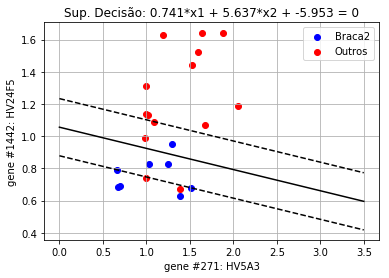

In [19]:
#provando gráfico para genes 271 e 1442
relatorio(z_prova,criar_sn(271,1442),271,1442)

[[28, 94, 0.151724, [13.149847217302247, -0.917430772900213, -14.088686336292314]], [28, 87, 0.14262, [13.201320608665569, -4.730472213647065, -10.891090706157406]], [28, 36, 0.129144, [13.732486300409109, -7.1592260992432, -12.759753994613803]], [14, 28, 0.11879, [-4.383583091348564, 16.255722086661308, -16.83744281137605]], [28, 88, 0.099499, [19.99582873179677, -2.0497846714094847, -22.765749366512544]], [28, 78, 0.096586, [19.869286970406375, -5.830072854676175, -20.38849832000013]], [28, 57, 0.080524, [13.33460330568191, 20.954376618983314, -34.12715498979712]], [17, 94, 0.06581, [-30.027548273963475, -4.68319561685765, 56.983471226510865]], [9, 28, 0.059055, [19.539228905103773, 27.662101224299573, -47.20457611581619]], [3, 28, 0.042412, [-9.47917189800837, 46.19446418528468, -44.59640619417558]]]


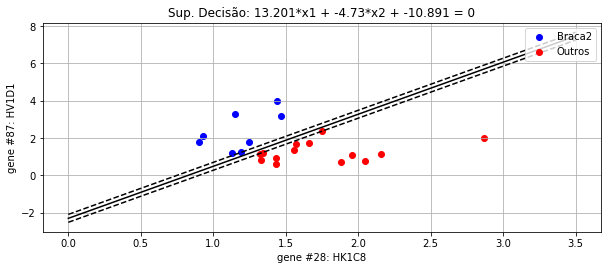

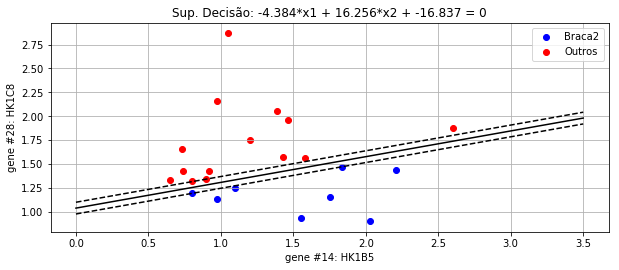

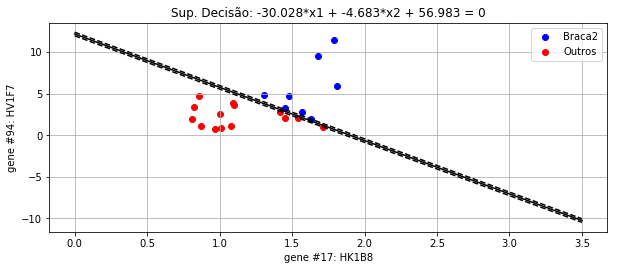

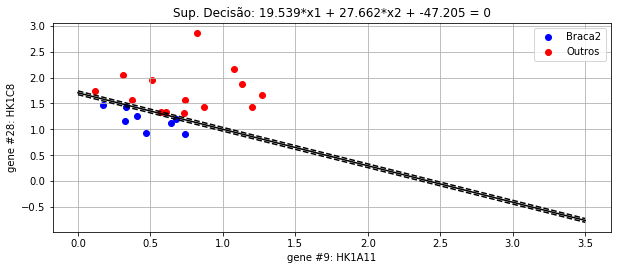

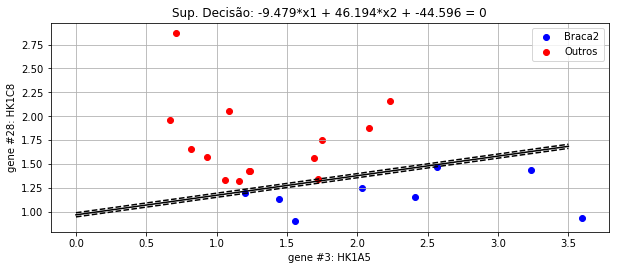

In [20]:
#gerar relatorio dos top10
def relatorio_top10(best10):
    for i in range(1,11):
        plt.figure(i,figsize=(10,50))
        plt.subplot(11,1,i)
        relatorio(best10[i-1][3],criar_sn(best10[i-1][0],best10[i-1][1]),best10[i-1][0],best10[i-1][1])

#imprimir relatorio dos 10 melhores
relatorio_top10(best10x)
print(best10x)